In [222]:
# Setup 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
colors = sns.color_palette()

Stall Speed

[34.59820521 39.92100601 45.24380681 50.56660761]


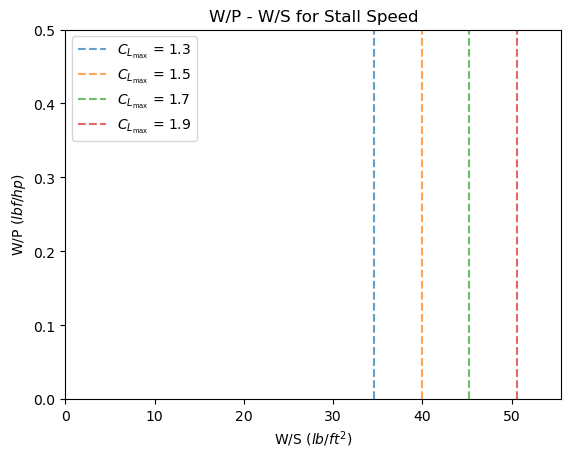

In [223]:
# CL_max is within 1.3 - 1.9
xlim = 100
N=100
rho_cruise = 1.8685e-3 # slugs/ft^3, assuming average cruise of 8,000 ft
v_stall = 1.68781 * 100 # Convert kts to ft/s
CL_max = np.array([1.3, 1.5, 1.7, 1.9]) # Variable range of CL_max values based on Table 3.1 in Roskam

# Calculate wing loading based on stall speed
WS_stall = 0.5 * rho_cruise * v_stall**2 * CL_max # lb/ft^2 
print(WS_stall)

# Plot W/S vs W/P
plt.figure()
for i, ws in enumerate(WS_stall):
    plt.axvline(x=ws, color=colors[i], linestyle='--', alpha=0.7, label=f'$C_{{L_{{\\text{{max}}}}}}$ = {CL_max[i]:.1f}')
plt.title('W/P - W/S for Stall Speed')
plt.xlabel("W/S $(lb/ft^2)$")
plt.ylabel("W/P $(lbf/hp)$")
plt.xlim(0, max(WS_stall)+5)
plt.ylim(0, 0.5)
plt.legend(loc='best')
plt.show()

Takeoff

TOP23: 149.54951952464464 


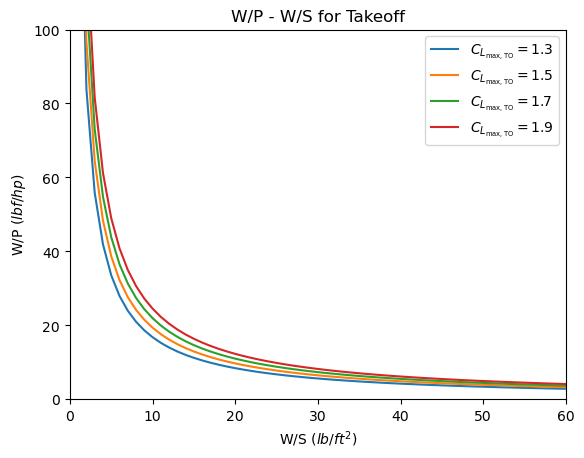

In [224]:
S_TO_G = 1000 # ft
S_TO = 1500 # ft
rho_SL = 23.77e-4 #slugs/ft3
rho_takeoff = 20.48e-4 #slugs/ft3, assuming takeoff altitude of 5000 ft

# Relating S_TO to TOP_23
TOP_23 = (-8.134 + np.sqrt(8.314**2 - 4 * 0.0149 * -S_TO)) / (2 * 0.0149)
print('TOP23: {} '.format(TOP_23))

W_S = np.linspace(1,xlim,N) # Create W/S array
k_s = 1.2 # Takeoff speed factor
v_TO = k_s * v_stall # Takeoff velocity

# Plotting W/P vs W/S
plt.figure()
for CL_max in CL_max:
    WP_TO = (TOP_23 * (rho_takeoff / rho_SL) * CL_max) / (W_S)
    plt.plot(W_S, WP_TO, label=rf'$C_{{L_{{\text{{max}}, \text{{TO}}}}}} = {CL_max}$')
plt.title('W/P - W/S for Takeoff')
plt.xlabel("W/S $(lb/ft^2)$")
plt.ylabel("W/P $(lbf/hp)$")
plt.xlim(0,60)
plt.ylim(0,100)
plt.legend(loc='best')
plt.show()

Landing

Required field length: 5608.106982174174 feet
For CL_max = 1.3: Landing ground roll distance = 2872.2322368108526 feet
For CL_max = 1.5: Landing ground roll distance = 2569.2679385694055 feet
For CL_max = 1.7: Landing ground roll distance = 2337.5893575612404 feet
For CL_max = 1.9: Landing ground roll distance = 2154.685214660057 feet


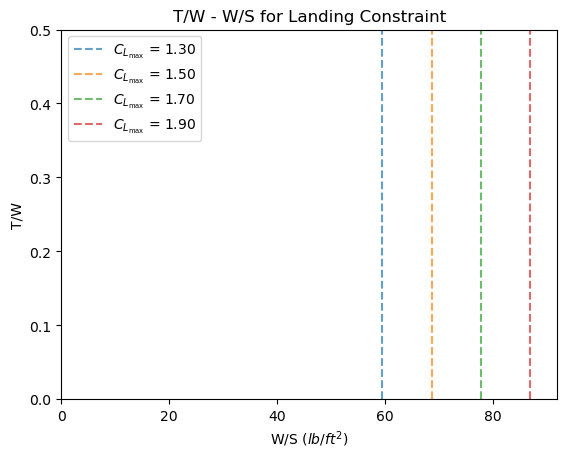

TW_landing: [59.5545     68.71673077 77.87896153 87.0411923  59.5545     68.71673077
 77.87896153 87.0411923  59.5545     68.71673077 77.87896153 87.0411923
 59.5545     68.71673077 77.87896153 87.0411923  59.5545     68.71673077
 77.87896153 87.0411923  59.5545     68.71673077 77.87896153 87.0411923
 59.5545     68.71673077 77.87896153 87.0411923  59.5545     68.71673077
 77.87896153 87.0411923  59.5545     68.71673077 77.87896153 87.0411923
 59.5545     68.71673077 77.87896153 87.0411923  59.5545     68.71673077
 77.87896153 87.0411923  59.5545     68.71673077 77.87896153 87.0411923
 59.5545     68.71673077 77.87896153 87.0411923  59.5545     68.71673077
 77.87896153 87.0411923  59.5545     68.71673077 77.87896153 87.0411923
 59.5545     68.71673077 77.87896153 87.0411923  59.5545     68.71673077
 77.87896153 87.0411923  59.5545     68.71673077 77.87896153 87.0411923
 59.5545     68.71673077 77.87896153 87.0411923  59.5545     68.71673077
 77.87896153 87.0411923  59.5545     68.71673

In [225]:
#Balanced field length
BFL= TOP_23*37.5
print(f"Required field length: {BFL} feet")

#Calculating landing distance
CL_max_values = np.array([1.3, 1.5, 1.7, 1.9])
W_TO = 19000 #lbs
W_L = 17000 #lbs
S_ref = 534.37 #lifting area
S_a = 600 # 600 ft for general aviation
for CL_max in CL_max_values:
    S_L_G = 80 * (W_L / S_ref) / (rho_takeoff/rho_SL * CL_max) + S_a
    print(f"For CL_max = {CL_max}: Landing ground roll distance = {S_L_G} feet")

#Calculate W/S
S_land = BFL *  0.6
W_S =  (rho_takeoff/rho_SL * CL_max_values) / (80*0.65) * (S_land - S_a)

# Plot W/S vs W/P
plt.figure()
for i, ws in enumerate(W_S):
    plt.axvline(x=ws, color=colors[i], linestyle='--', alpha=0.7, label=f'$C_{{L_{{\\text{{max}}}}}}$ = {CL_max_values[i]:.2f}')
plt.title('T/W - W/S for Landing Constraint')
plt.xlabel("W/S $(lb/ft^2)$")
plt.ylabel("T/W")
plt.xlim(0, max(W_S)+5)
plt.ylim(0, 0.5)
plt.legend(loc='best')
plt.show()

#TW calculation
TW_landing = np.tile(W_S, 50)
print(f"TW_landing: {TW_landing}")

Climb

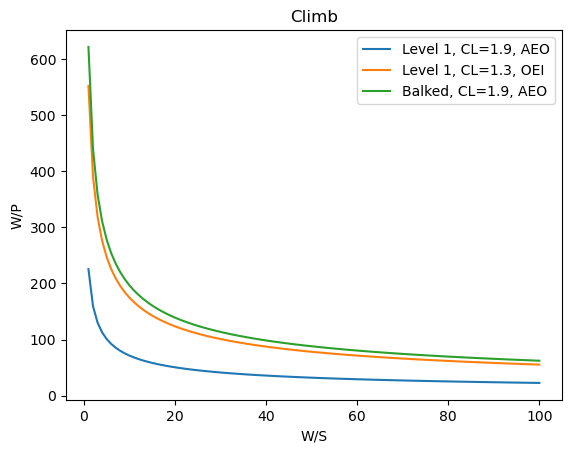

In [226]:
# climb analysis
# FAR 23 Requirements

def PW_vs_WS(
        G,
        CD,
        CL,
        WS,
        rho
):
    PW = (G + (CL/CD)**(-1))/(CL**(1/2)) * (WS**(1/2))/(18.97*0.8*(rho/rho_SL))

    return PW

WS = np.linspace(1, xlim, N)

rho_5k = 20.48e-4 #slug/ft^3
CD0 = 0.01849
k = 0.04198
G_LVL1 = 0.083 # 8.3% for landplanes
ks = 1.2
# MTOW, flaps down, AEO, 0.94*T_TO

case1_PW = []

for i in WS:
    case1_PW.append((PW_vs_WS(G=G_LVL1,CD=CD0,CL=1.9,WS=i,rho=rho_SL)*((W_TO)/W_TO)**(3/2))**(-1))


G_LVL1_2 = 0.015 # at 5000ft
# MTOW, flaps up, OEI, T_TO

case2_PW = []

for i in WS:
    case2_PW.append((PW_vs_WS(G=G_LVL1_2,CD=CD0,CL=1.3,WS=i,rho=rho_5k)*(12/11)*((W_TO-2000)/W_TO)**(3/2))**(-1))



G_balk = 0.03
ks_balk = 1.3
#MTOW, landing flaps, AEO

case3_PW = []

for i in WS:
    case3_PW.append((PW_vs_WS(G=G_balk,CD=CD0,CL=1.9,WS=i,rho=rho_SL)*((W_TO-2000)/W_TO)**(3/2))**(-1))

plt.figure()
plt.plot(WS,case1_PW,label="Level 1, CL=1.9, AEO")
plt.plot(WS,case2_PW,label="Level 1, CL=1.3, OEI")
plt.plot(WS,case3_PW,label="Balked, CL=1.9, AEO")
plt.xlabel('W/S')
plt.ylabel('W/P')
plt.legend()
plt.title('Climb')
plt.show()

Cruise Speed

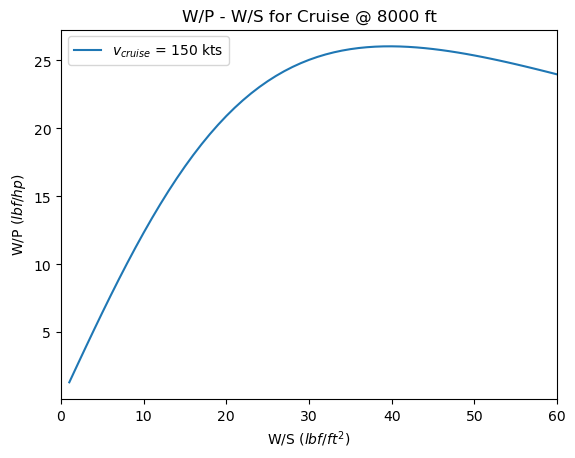

In [227]:
def cruise_power_sizing(v_cruise, rho_cruise, eta_prop, CD0, k, xlim, N):
    """
    Compute the weight-to-power ratio (W/P) for cruise flight with a density-based power adjustment.

    Parameters:
    v_cruise: Cruise velocity in knots
    rho_cruise: Air density at cruise altitude (slugs/ft³)
    eta_prop: Propeller efficiency
    CD0: Zero-lift drag coefficient
    k: Induced drag constant (1 / (pi * e * AR))

    Returns:
    WP_cruise: Weight-to-power ratio (W/P) in lbf/hp
    WS: Wing loading (W/S) in lbf/ft²
    """
    
    rho_SL = 23.77e-4  # Sea level air density (slugs/ft³)
    WS = np.linspace(1, xlim, N)  # Wing loading values in lbf/ft²
    v_cruise = 1.6878 * v_cruise  # Convert knots to ft/s
    q_cruise = 0.5 * rho_cruise * v_cruise**2  # Dynamic pressure (psf)
    
    # Compute power loading W/P
    WP_cruise = 1 / (
        ((q_cruise * v_cruise * (CD0 + (k * WS**2) / (q_cruise**2))) / (550 * eta_prop * WS))
        * (rho_SL / rho_cruise) ** 0.75
    )
    
    return WP_cruise, WS

# Use function
WP_cruise, WS = cruise_power_sizing(v_cruise=150, 
                                rho_cruise=rho_cruise,
                                eta_prop=0.8, 
                                CD0=CD0, 
                                k=k,
                                xlim=xlim,
                                N=N
)

# Plot
plt.figure()
plt.plot(WS,WP_cruise,label="$v_{cruise}$ = 150 kts")
plt.xlabel('W/S $(lbf/ft^2)$')
plt.ylabel('W/P $(lbf/hp)$')
plt.title('W/P - W/S for Cruise @ 8000 ft')
plt.xlim(0,60)
plt.legend()
plt.show()

Ceiling

Induced Drag Factor: k = 0.05421
Minimum Thrust over Weight: T/W = 0.0572


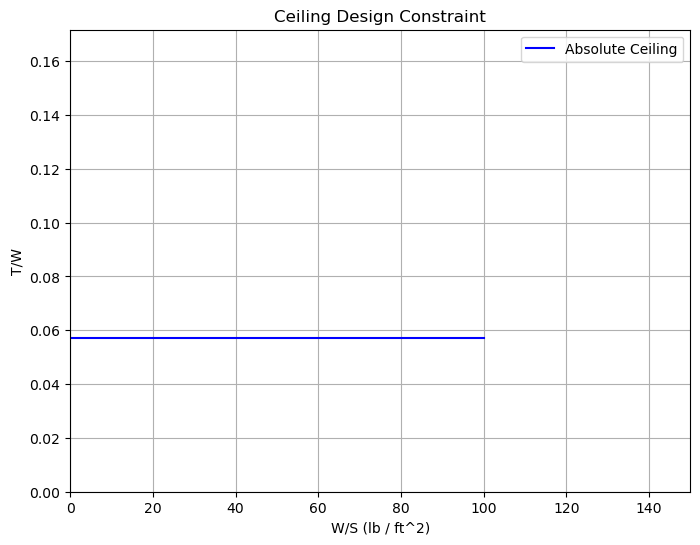

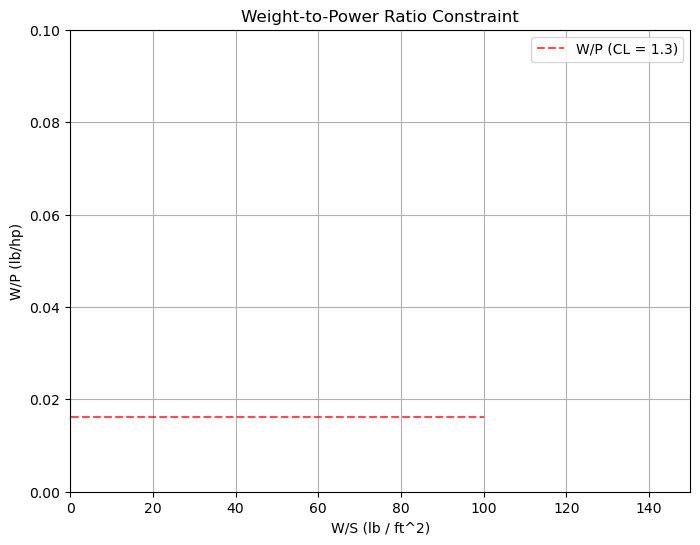

In [228]:
# Constants
W = 16856  # Takeoff Weight (lb)
S_ref = 654.375  # Reference Wing Area (ft^2)
e = 0.7113  # Oswald's Efficiency Factor
Cd0 = 0.0151  # Zero Lift Drag Coefficient
AR = 8.2556  # Aspect Ratio
prop_eff = 0.8  # Propeller Efficiency
CL_clean = 1.3  # Lift Coefficient (Clean Configuration 1)

max_alt = 25000  # Maximum Altitude (ft)
rho = 0.0343  # Air Density at 25,000 ft (lb/ft^3)

# Induced Drag Factor
k = 1 / (np.pi * e * AR)

# Minimum Thrust-to-Weight Ratio
T_W_min = 2 * np.sqrt(k * Cd0)

# Wing Loading Values (start from 0.1 to avoid division by zero)
W_S_vals = np.linspace(0.1, xlim, N)

# Absolute Ceiling Values
abs_ceiling_vals = [T_W_min] * 100

# Velocity and W/P Calculations for CL = 1.3
V_1 = np.sqrt((2 * W) / (rho * CL_clean))
W_P = (T_W_min ** (-1)) * prop_eff / V_1
W_P_vals = [W_P] * 100

# Print Results
print(f"Induced Drag Factor: k = {k:.5f}")
print(f"Minimum Thrust over Weight: T/W = {T_W_min:.4f}")

# Plot 1: Absolute Ceiling (T/W vs W/S)
plt.figure(figsize=(8, 6))
plt.plot(W_S_vals, abs_ceiling_vals, label="Absolute Ceiling", color='b')

plt.xlim(0, 150)
plt.ylim(0, T_W_min * 3)

plt.xlabel("W/S (lb / ft^2)")
plt.ylabel("T/W")
plt.title("Ceiling Design Constraint")
plt.legend()
plt.grid(True)
plt.show()

# Plot 2: Weight-to-Power Ratio (W/P vs W/S)
plt.figure(figsize=(8, 6))
plt.plot(W_S_vals, W_P_vals, label="W/P (CL = 1.3)", color='r', linestyle='--', alpha=0.7)

plt.xlim(0, 150)
plt.ylim(0, 0.1)  # Adjust y-axis limit dynamically

plt.xlabel("W/S (lb / ft^2)")
plt.ylabel("W/P (lb/hp)")
plt.title("Weight-to-Power Ratio Constraint")
plt.legend()
plt.grid(True)
plt.show()

Maneuver

1071.4734663602737


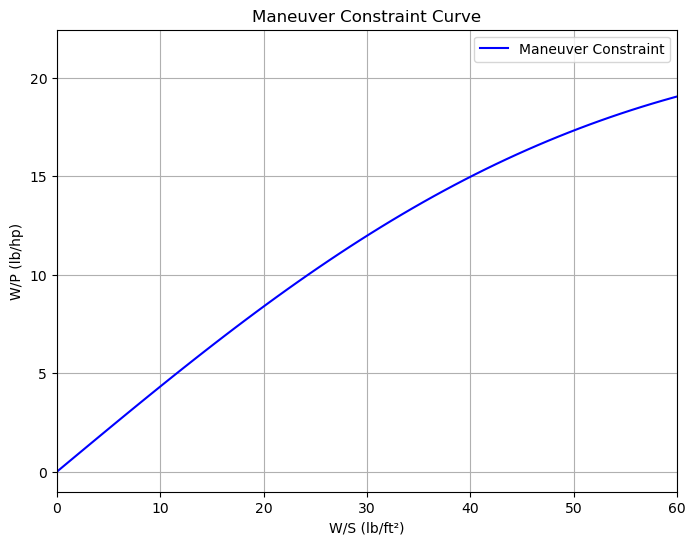

In [229]:
# Given parameters
CD_0 = 0.0151  # Zero-lift drag coefficient
n = 1 / np.cos(np.deg2rad(45))  # Load factor for 45° bank
eta_p= 0.8  # Propeller efficiency

# Define wing loading range
WS = np.linspace(0.1, xlim, N)

# Dynamic pressure (using V = 110 kts)
v_MN = 1.68781 * 110  # ft/s
q_MN = 0.5 * rho_SL * v_MN**2

R = 1 / (np.sqrt(n**2 - 1) * (32.17 / (v_MN**2)))
print(R)

TW_MN = (q_MN * CD_0) / WS + ((n/q_MN)**2 * WS * k)

# Compute W/P using velocity, prop efficiency, and HP conversion
WP_MN = (v_MN * eta_p) / (550 * TW_MN) # lbf/hp

# Plot
plt.figure(figsize=(8, 6))
plt.plot(WS, WP_MN, label="Maneuver Constraint", color='b')
plt.xlim(0, 60)
plt.xlabel("W/S (lb/ft²)")
plt.ylabel("W/P (lb/hp)")
plt.title("Maneuver Constraint Curve")
plt.legend()
plt.grid()
plt.show()

Total Constraint Layover Graph

Design Parameters: 25.0 $lbf/ft^2$, 9.998662193469894 $lbf/hp$


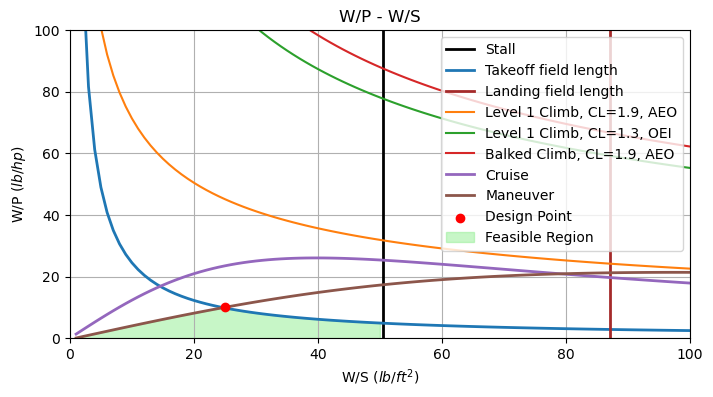

In [235]:
CL_max_19 = 1.9 # Setting CL_max = 1.9 for stall, takeoff, and landing

WS = np.linspace(1, xlim, N) # Create WS array
WS_stall = 0.5 * rho_cruise * v_stall**2 * CL_max_19
WP_TO_19 = (TOP_23 * (rho_takeoff / rho_SL) * CL_max_19) / (WS)
WS_landing =  (rho_takeoff/rho_SL * CL_max_19) / (80*0.65) * (S_land - S_a)

# Find intersection
intersection_idx = np.argmin(np.abs(WP_MN - WP_TO_19))  # Find index of minimum difference
intersection_ws = WS[intersection_idx]  # W/S value at intersection
intersection_wp = WP_MN[intersection_idx]  # W/P value at intersection
print('Design Parameters: {} $lbf/ft^2$, {} $lbf/hp$'.format(intersection_ws, intersection_wp))

plt.figure(figsize=(8,4))
plt.axvline(x=WS_stall, label='Stall', color='k', linestyle='-', linewidth=2)
plt.plot(WS, WP_TO_19, label='Takeoff field length', linestyle='-', linewidth=2)
plt.axvline(x=WS_landing, label='Landing field length', color='brown', linestyle='-', linewidth=2)
plt.plot(WS,case1_PW,label="Level 1 Climb, CL=1.9, AEO")
plt.plot(WS,case2_PW,label="Level 1 Climb, CL=1.3, OEI")
plt.plot(WS,case3_PW,label="Balked Climb, CL=1.9, AEO")
plt.plot(WS,WP_cruise, label='Cruise', linestyle='-', linewidth=2)
plt.plot(WS, WP_MN, label="Maneuver", linestyle='-', linewidth=2)
plt.scatter(intersection_ws, intersection_wp, color='red', zorder=5, label='Design Point')
plt.fill_between(WS, 0, np.minimum(WP_MN, WP_TO_19), where=(WS <= WS_stall), color='lightgreen', alpha=0.5, label="Feasible Region")
plt.title('W/P - W/S')
plt.xlabel("W/S $(lb/ft^2)$")
plt.ylabel("W/P $(lb/hp)$")
plt.xlim(0,100)
plt.ylim(0,100)
plt.grid(True)
plt.legend(loc='upper right')